In [1091]:
#!pip install vectorgebra    # Decomment this line to install vectorgebra
#!pip install mlgebra        # Decomment this line to install mlgebra
from mlgebra import *
from vectorgebra import *
import matplotlib.pyplot as plt
import numpy as np # To load the dataset

logger.setLevel(logging.WARNING)  # This library is loaded from vectorgebra and is used also by mlgebra
np.random.seed(0)


MLgebra, is a basic machine learning library that I have created. It features multi-layer perceptrons as "Dense" layers.
Kernels of the all of the algorithms used in the library are coded by me, so it is my own implementation as it is requested in the Ninova.

This library as its backend, uses "vectorgebra" library to calculate mathematical and linear algebraic operations. Vectorgebra, is a numerical methods library that I have also created.

[Vectorgebra](https://github.com/ahmeterdem1/Vector)
[MLgebra](https://github.com/ahmeterdem1/ml)

In [1092]:
model = Model("MLP", "crossentropy")

model.structure([
    Dense(input_shape=2, units=2, activation="relu", bias="zero"),
    Dense(input_shape=2, units=2, activation="relu", bias="zero"),
    Dense(input_shape=2, units=2, activation="softmax", bias="zero")
])

# Prepare the model


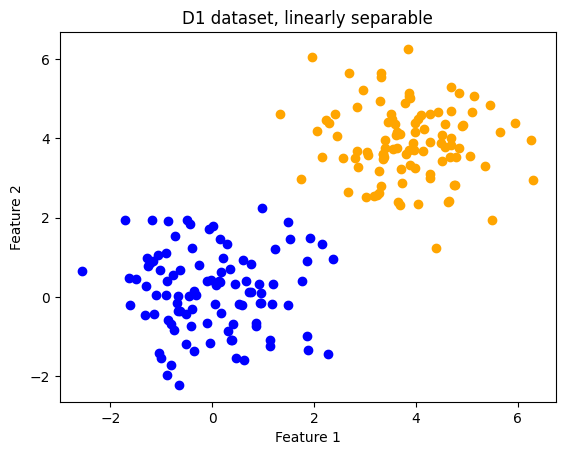

In [1093]:
# Prepare the data in vectorgebra

first100 = np.random.normal(0, 1, (100, 2)).tolist()
second100 = (np.random.normal(3, 1, (100, 2)) + 1).tolist()
first100 = [Vector(*p) for p in first100]
second100 = [Vector(*p) for p in second100]

random.shuffle(first100)  # "random" library is imported from vectorgebra by default
random.shuffle(second100)

train_dataset = []
for k in range(90):
    train_dataset.append(first100[k])
for k in range(90):
    train_dataset.append(second100[k])

test_dataset = []
for k in range(10):
    test_dataset.append(first100[k + 90])
for k in range(10):
    test_dataset.append(second100[k + 90])

train_labels = [Vector(1, 0) if k%2==0 else Vector(0, 1) for k in range(180)]
test_labels = [Vector(1, 0) if k%2==0 else Vector(0, 1) for k in range(20)]

train_combined = list(zip(train_dataset, train_labels))
test_combined = list(zip(test_dataset, test_labels))
random.shuffle(train_combined)
random.shuffle(test_combined)

train_dataset, train_labels = zip(*train_combined)
test_dataset, test_labels = zip(*test_combined)
    
for v in first100:
    plt.scatter(v[0], v[1], color="blue", label="Class 1")
for v in second100:
    plt.scatter(v[0], v[1], color="orange", label="Class 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("D1 dataset, linearly separable")
plt.show()

In [1094]:
for k in range(20):
    model.train(train_dataset, train_labels, batch_size=1, lr=0.1)

In [1095]:
correct = 0
for k, v in enumerate(test_dataset):
    res = model.produce(v)
    print(res, test_labels[k])
    i = res.values.index(maximum(res))
    if test_labels[k][i] == 1:
        correct += 1
    
print(f"Accuracy on the test set is {correct / 20}")

correct = 0
for k, v in enumerate(train_dataset):
    res = model.produce(v)
    i = res.values.index(maximum(res))
    if train_labels[k][i] == 1:
        correct += 1
        
print(f"Accuracy on the train set is {correct / 180}")
    

[0.5466066735308124, 0.4533933264691876] [1, 0]
[0.5466066735308124, 0.4533933264691876] [1, 0]
[0.5466066735308124, 0.4533933264691876] [1, 0]
[0.5466066735308124, 0.4533933264691876] [1, 0]
[0.5466066735308124, 0.4533933264691876] [0, 1]
[0.5466066735308124, 0.4533933264691876] [0, 1]
[0.5466066735308124, 0.4533933264691876] [0, 1]
[0.5466066735308124, 0.4533933264691876] [0, 1]
[0.5466066735308124, 0.4533933264691876] [0, 1]
[0.5466066735308124, 0.4533933264691876] [0, 1]
[0.5466066735308124, 0.4533933264691876] [1, 0]
[0.5466066735308124, 0.4533933264691876] [0, 1]
[0.5466066735308124, 0.4533933264691876] [1, 0]
[0.5466066735308124, 0.4533933264691876] [1, 0]
[0.5466066735308124, 0.4533933264691876] [0, 1]
[0.5466066735308124, 0.4533933264691876] [0, 1]
[0.5466066735308124, 0.4533933264691876] [1, 0]
[0.5466066735308124, 0.4533933264691876] [0, 1]
[0.5466066735308124, 0.4533933264691876] [1, 0]
[0.5466066735308124, 0.4533933264691876] [1, 0]
Accuracy on the test set is 0.5
Accuracy

In [1096]:
#model.saveModel("./")

In [1097]:
model2 = Model("MLP2", "crossentropy")

model2.structure([
    Dense(input_shape=2, units=2, activation="relu", bias="zero"),
    Dense(input_shape=2, units=2, activation="relu", bias="zero"),
    Dense(input_shape=2, units=2, activation="softmax", bias="zero")
])


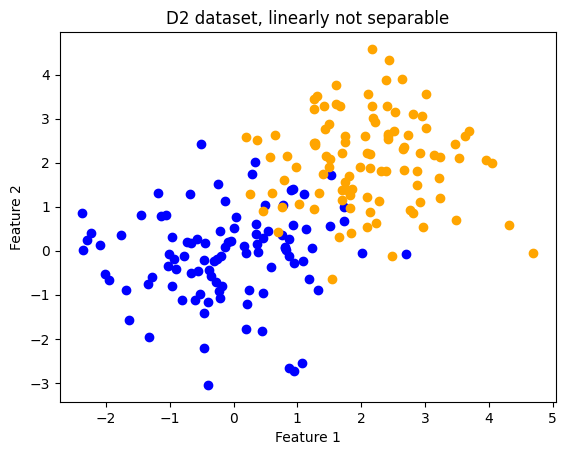

In [1098]:
first100_nonlinear = np.random.normal(0, 1, (100, 2)).tolist()
second100_nonlinear = np.random.normal(2.2, 1, (100, 2)).tolist()
first100_nonlinear = [Vector(*p) for p in first100_nonlinear]
second100_nonlinear = [Vector(*p) for p in second100_nonlinear]

random.shuffle(first100_nonlinear)  # "random" library is imported from vectorgebra by default
random.shuffle(second100_nonlinear)

train_dataset = []
for k in range(90):
    train_dataset.append(first100_nonlinear[k])
for k in range(90):
    train_dataset.append(second100_nonlinear[k])

test_dataset = []
for k in range(10):
    test_dataset.append(first100_nonlinear[k + 90])
for k in range(10):
    test_dataset.append(second100_nonlinear[k + 90])

train_labels = [Vector(1, 0) if k%2==0 else Vector(0, 1) for k in range(180)]
test_labels = [Vector(1, 0) if k%2==0 else Vector(0, 1) for k in range(20)]

train_combined = list(zip(train_dataset, train_labels))
test_combined = list(zip(test_dataset, test_labels))
random.shuffle(train_combined)
random.shuffle(test_combined)

train_dataset, train_labels = zip(*train_combined)
test_dataset, test_labels = zip(*test_combined)
    
for v in first100_nonlinear:
    plt.scatter(v[0], v[1], color="blue", label="Class 1")
for v in second100_nonlinear:
    plt.scatter(v[0], v[1], color="orange", label="Class 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("D2 dataset, linearly not separable")
plt.show()

In [1099]:
print("First weight of the last layer before training: " ,model2.layers[-1].w_matrix[0][0])
for k in range(20):
    for l, data in enumerate(train_dataset):
        res = model2.produce(data)
        i = res.values.index(maximum(res))
        if train_labels[l][i] == 1:
            continue
        else:
            model2.train(train_dataset[l:l+1], train_labels[l:l+1], batch_size=1, 
                         lr=0.3)
print("First weight of the last layer after training: ", model2.layers[-1].w_matrix[0][0])

First weight of the last layer before training:  -0.43987120557451
First weight of the last layer after training:  0.328855051159155


In [1100]:
correct = 0
for k, v in enumerate(test_dataset):
    res = model2.produce(v)
    print(res, test_labels[k])
    i = res.values.index(maximum(res))
    if test_labels[k][i] == 1:
        correct += 1
    
print(f"Accuracy on the test set is {correct / 20}")

correct = 0
for k, v in enumerate(train_dataset):
    res = model2.produce(v)
    i = res.values.index(maximum(res))
    if train_labels[k][i] == 1:
        correct += 1
        
print(f"Accuracy on the train set is {correct / 180}")

[0.5405155626931213, 0.45948443730687866] [0, 1]
[0.5405155626931213, 0.45948443730687866] [1, 0]
[0.5405155626931213, 0.45948443730687866] [0, 1]
[0.5405155626931213, 0.45948443730687866] [1, 0]
[0.5405155626931213, 0.45948443730687866] [1, 0]
[0.5405155626931213, 0.45948443730687866] [0, 1]
[0.5405155626931213, 0.45948443730687866] [1, 0]
[0.5405155626931213, 0.45948443730687866] [0, 1]
[0.5405155626931213, 0.45948443730687866] [0, 1]
[0.5405155626931213, 0.45948443730687866] [0, 1]
[0.5405155626931213, 0.45948443730687866] [0, 1]
[0.5405155626931213, 0.45948443730687866] [1, 0]
[0.5405155626931213, 0.45948443730687866] [1, 0]
[0.5405155626931213, 0.45948443730687866] [1, 0]
[0.5405155626931213, 0.45948443730687866] [0, 1]
[0.5405155626931213, 0.45948443730687866] [0, 1]
[0.5405155626931213, 0.45948443730687866] [0, 1]
[0.5405155626931213, 0.45948443730687866] [1, 0]
[0.5405155626931213, 0.45948443730687866] [1, 0]
[0.5405155626931213, 0.45948443730687866] [1, 0]
Accuracy on the test

In [1101]:
#model2.saveModel("./")